In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import Ridge, LinearRegression, SGDRegressor, Lasso, ElasticNet
from xgboost import XGBRegressor


In [5]:
test_data = pd.read_csv("/content/drive/MyDrive/Kaggle/test.csv")

In [6]:
train_data = pd.read_csv("/content/drive/MyDrive/Kaggle/train.csv")

In [7]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
train_data = train_data.drop(['Id'] , axis =1)
test_data = test_data.drop(['Id'] , axis =1)


In [11]:
print('Number of rows:', train_data.shape[0])
print('Number of columns:', train_data.shape[1])

Number of rows: 1460
Number of columns: 80


In [12]:
train_data = train_data.select_dtypes(include=['int64', 'float64'])
test_data =  test_data.select_dtypes(include=['int64', 'float64'])


In [13]:
train_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [14]:
train_data.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [15]:
test_data.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [16]:
test_data.fillna(test_data.median(), inplace = True)
test_data.isnull().sum()


MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [17]:
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median())
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median())

In [18]:
sum(train_data.duplicated())

0

In [19]:
x = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

In [20]:
skewed_features = [col for col in train_data.columns if train_data[col].skew() > 0.5]
print(len(skewed_features))


27


In [21]:
train_data[skewed_features] = train_data[skewed_features].apply(lambda x: np.log1p(x))


In [22]:
skewed_features.remove('SalePrice')


In [23]:
test_data[skewed_features] = test_data[skewed_features].apply(lambda x: np.log1p(x))


In [24]:
x = train_data.drop('SalePrice', axis = 1)
y = train_data['SalePrice']


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


In [26]:
test_data = sc.transform(test_data)


In [27]:
lr = LinearRegression()
cv_score = cross_validate(lr, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score

{'fit_time': array([0.04553175, 0.00490546, 0.00877404, 0.02071953, 0.01011944,
        0.01014113, 0.00941491, 0.01048899, 0.01115417, 0.00534248]),
 'score_time': array([0.001724  , 0.0013926 , 0.00163555, 0.00130033, 0.00124907,
        0.00151539, 0.00127053, 0.0012691 , 0.0018661 , 0.00145435]),
 'test_neg_mean_squared_error': array([-0.01762168, -0.01329434, -0.01455703, -0.02857214, -0.02350528,
        -0.01650958, -0.01522591, -0.01464452, -0.03396996, -0.01902501]),
 'test_neg_root_mean_squared_error': array([-0.13274667, -0.11530108, -0.12065251, -0.16903296, -0.15331432,
        -0.1284896 , -0.12339333, -0.12101456, -0.1843094 , -0.13793119])}

In [28]:
 cv_score['test_neg_root_mean_squared_error'].mean()


-0.13861856201527376

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


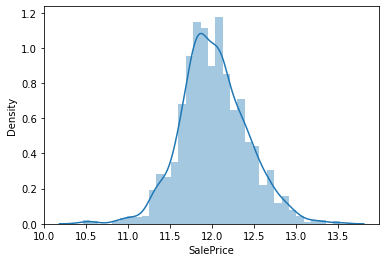

In [29]:
#Checking data skewness
sns.distplot(y)


In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)


LinearRegression()

In [31]:
model.score(x, y)


0.8860406993795062

In [32]:
y_pred = model.predict(x)
y_pred


array([12.26354905, 12.17866885, 12.32404922, ..., 12.28162312,
       11.77022057, 11.8889255 ])

In [33]:
r2_score(y, y_pred)


0.8860406993795062

In [34]:
mean_squared_error(y,y_pred, squared=False)


0.13479933233010669

In [35]:
valid_pred = model.predict(x)


In [36]:
r2_score(y,valid_pred)


0.8860406993795062

In [37]:
lr = SGDRegressor()
cv_score = cross_validate(lr, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score


{'fit_time': array([0.00919104, 0.00611401, 0.00586104, 0.00648808, 0.00779653,
        0.00681496, 0.00602341, 0.00689268, 0.00654697, 0.00606227]),
 'score_time': array([0.00162697, 0.00132442, 0.00136924, 0.00132251, 0.00146103,
        0.00156212, 0.001513  , 0.00148916, 0.00128961, 0.00136328]),
 'test_neg_mean_squared_error': array([-0.01744492, -0.01374154, -0.01477338, -0.02989923, -0.02325309,
        -0.01481419, -0.01639873, -0.01433944, -0.03282372, -0.02021519]),
 'test_neg_root_mean_squared_error': array([-0.13207923, -0.11722431, -0.12154579, -0.17291393, -0.15248965,
        -0.12171354, -0.12805752, -0.11974739, -0.18117317, -0.14218014])}

In [38]:
 cv_score['test_neg_root_mean_squared_error'].mean()


-0.1389124674658469

In [39]:
lr = Ridge()
cv_score = cross_validate(lr, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score

{'fit_time': array([0.03970337, 0.01404428, 0.00826859, 0.00636458, 0.02212715,
        0.01887918, 0.00808883, 0.00713396, 0.00719476, 0.00928879]),
 'score_time': array([0.00137138, 0.00119972, 0.00122905, 0.00122333, 0.00127053,
        0.00128794, 0.00121379, 0.00122881, 0.00112772, 0.00119448]),
 'test_neg_mean_squared_error': array([-0.01760055, -0.01329618, -0.01455547, -0.0285895 , -0.02348017,
        -0.01644529, -0.01521816, -0.0146384 , -0.0340142 , -0.01902803]),
 'test_neg_root_mean_squared_error': array([-0.13266706, -0.11530908, -0.12064604, -0.16908431, -0.1532324 ,
        -0.12823921, -0.12336189, -0.12098925, -0.18442938, -0.13794213])}

In [40]:
 cv_score['test_neg_root_mean_squared_error'].mean()


-0.13859007384736366

In [41]:
lr = Lasso()
cv_score = cross_validate(lr, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score


{'fit_time': array([0.02134991, 0.00798583, 0.00821424, 0.00741625, 0.00863743,
        0.01450896, 0.00254822, 0.0079    , 0.00696254, 0.00719953]),
 'score_time': array([0.00183058, 0.00494266, 0.00282264, 0.00147557, 0.00153685,
        0.00120497, 0.0084269 , 0.00131154, 0.00126052, 0.00125217]),
 'test_neg_mean_squared_error': array([-0.14341533, -0.15630501, -0.18018288, -0.18129443, -0.20644308,
        -0.12964349, -0.15215326, -0.14038881, -0.14419366, -0.16252923]),
 'test_neg_root_mean_squared_error': array([-0.37870216, -0.39535428, -0.42447954, -0.42578684, -0.45436008,
        -0.3600604 , -0.39006828, -0.37468495, -0.3797284 , -0.40314914])}

In [42]:
 cv_score['test_neg_root_mean_squared_error'].mean()


-0.3986374079901046

In [43]:
lr = Lasso(alpha = 0.001)
cv_score = cross_validate(lr, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score


{'fit_time': array([0.0216558 , 0.03503227, 0.02866864, 0.01592517, 0.01315451,
        0.01385522, 0.01497889, 0.00809431, 0.00817823, 0.02155352]),
 'score_time': array([0.00409937, 0.00167179, 0.00185108, 0.00136161, 0.00127149,
        0.001297  , 0.00136971, 0.0013063 , 0.00135779, 0.00134873]),
 'test_neg_mean_squared_error': array([-0.01760248, -0.01307937, -0.01458151, -0.02839255, -0.02360642,
        -0.0162101 , -0.01526653, -0.0146631 , -0.03369376, -0.01863838]),
 'test_neg_root_mean_squared_error': array([-0.13267433, -0.11436505, -0.12075392, -0.16850088, -0.1536438 ,
        -0.1273189 , -0.12355779, -0.1210913 , -0.18355859, -0.13652246])}

In [44]:
 cv_score['test_neg_root_mean_squared_error'].mean()


-0.13819870387313646

In [45]:
lr = ElasticNet()
cv_score = cross_validate(lr, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score


{'fit_time': array([0.00312781, 0.00257564, 0.00331759, 0.0024116 , 0.00319433,
        0.00728011, 0.00879836, 0.00668931, 0.00699162, 0.00252843]),
 'score_time': array([0.00115824, 0.00123525, 0.00108695, 0.0011158 , 0.00183153,
        0.00140762, 0.00154662, 0.00124812, 0.00122881, 0.00119925]),
 'test_neg_mean_squared_error': array([-0.14341533, -0.15630501, -0.18018288, -0.18129443, -0.20644308,
        -0.12964349, -0.15215326, -0.14038881, -0.14419366, -0.16252923]),
 'test_neg_root_mean_squared_error': array([-0.37870216, -0.39535428, -0.42447954, -0.42578684, -0.45436008,
        -0.3600604 , -0.39006828, -0.37468495, -0.3797284 , -0.40314914])}

In [46]:
 cv_score['test_neg_root_mean_squared_error'].mean()


-0.3986374079901046

In [47]:
from sklearn.svm import SVR


In [48]:
svr_linear_model = SVR(kernel = 'linear' , C =1)

cv_score = cross_validate(svr_linear_model, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score


{'fit_time': array([1.48681808, 1.59659529, 1.52418494, 1.0627048 , 0.86813259,
        1.07648921, 1.66450119, 1.34971333, 1.48364162, 1.42712665]),
 'score_time': array([0.00521922, 0.00539398, 0.00529242, 0.00298905, 0.00288892,
        0.00558257, 0.00523162, 0.00546288, 0.00518584, 0.00513649]),
 'test_neg_mean_squared_error': array([-0.01750344, -0.01270453, -0.01403249, -0.02864269, -0.02368149,
        -0.015531  , -0.01527397, -0.01471713, -0.03544955, -0.01865249]),
 'test_neg_root_mean_squared_error': array([-0.13230056, -0.11271437, -0.1184588 , -0.16924152, -0.15388792,
        -0.12462345, -0.12358789, -0.12131419, -0.1882805 , -0.1365741 ])}

In [49]:
 cv_score['test_neg_root_mean_squared_error'].mean()


-0.13809832958458051

In [50]:
svr_linear_model = SVR(kernel = 'poly' , C =1)

cv_score = cross_validate(svr_linear_model, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score


{'fit_time': array([0.1190486 , 0.11345339, 0.13610005, 0.10193491, 0.11781716,
        0.12358308, 0.12008691, 0.12031484, 0.11587763, 0.11411333]),
 'score_time': array([0.0060606 , 0.00585794, 0.00606465, 0.00579977, 0.00621867,
        0.00620747, 0.00603652, 0.00615001, 0.00595832, 0.00602365]),
 'test_neg_mean_squared_error': array([-0.02164076, -0.01865802, -0.02275428, -0.06364471, -0.02765557,
        -0.02229145, -0.01938501, -0.0247296 , -0.04471436, -0.02531144]),
 'test_neg_root_mean_squared_error': array([-0.14710798, -0.13659435, -0.15084523, -0.25227902, -0.16629964,
        -0.14930323, -0.13923008, -0.15725648, -0.21145771, -0.1590957 ])}

In [51]:
 cv_score['test_neg_root_mean_squared_error'].mean()


-0.16694694197031285

In [52]:
svr_linear_model = SVR(kernel = 'rbf' , C =1)

cv_score = cross_validate(svr_linear_model, x, y,
                          cv = 10,
                          scoring = ['neg_root_mean_squared_error', 'neg_mean_squared_error'])
cv_score


{'fit_time': array([0.30708861, 0.32106733, 0.15123868, 0.14339948, 0.13988304,
        0.15274954, 0.12140322, 0.11655903, 0.12080407, 0.11784816]),
 'score_time': array([0.02944183, 0.01538205, 0.01630139, 0.01093769, 0.01092696,
        0.01552105, 0.01144862, 0.01117563, 0.01088738, 0.01074004]),
 'test_neg_mean_squared_error': array([-0.01804037, -0.02379553, -0.02080895, -0.03957049, -0.03419342,
        -0.0168579 , -0.0215647 , -0.01546492, -0.03038016, -0.02655896]),
 'test_neg_root_mean_squared_error': array([-0.13431443, -0.15425801, -0.14425307, -0.19892333, -0.18491463,
        -0.12983798, -0.14684925, -0.12435804, -0.17429905, -0.16296921])}

In [53]:
 cv_score['test_neg_root_mean_squared_error'].mean()


-0.15549769962290302

In [54]:
svr_linear_model = SVR(kernel = 'rbf' , C =1)
svr_linear_model.fit(x, y)


SVR(C=1)

In [55]:

LR = Lasso(alpha = 0.001)
LR.fit(x, y)

Lasso(alpha=0.001)

In [56]:
y_pred = np.expm1(svr_linear_model.predict(test_data))
y_pred


array([124425.98448813, 161387.91442933, 174320.79709768, ...,
       170215.57103686, 136894.85339343, 227639.80968725])

In [57]:
submission = pd.DataFrame({'Id': range(1461, 1461 + len(test_data)), 'SalePrice': y_pred})


In [58]:
submission.to_csv('submission.csv', index = False)